In [1]:
import random
from six.moves import cPickle as pickle
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
from PIL import Image
import numpy as np
from scipy.misc import comb
from math import log, exp, sqrt
import seaborn as sns
sns.set_context("paper")
# sns.set_context('talk')
import string
import json
import pickle
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## word neighbors

In [2]:
# Constants
itow = json.load(open('../data/coco/cocotalk.json', 'r'))['ix_to_word']
WORDS = {int(k): v for k, v in itow.items()}
if 0 not in WORDS:
    WORDS[0] = 'EOS'
MATCH = {v: k for k,v in WORDS.items()}
del itow
FF = pickle.load(open('../data/coco/idf_coco_01.pkl', 'rb'))
F = pickle.load(open('cooc_freq.pkl', 'rb'))[0]

# utils:
def normalize(A):
    l1 = A.sum(axis=1)
    A /= l1.reshape(len(A), 1)
    return A

def invocab(ngram):
    for w in ngram:
        if w not in MATCH:
            return False
    return True

def exps(sim, tau=0.2, freq=False):
    if freq:
        return normalize(np.exp((sim-1 - tau * FF)/tau))
    else:
        return normalize(np.exp((sim-1)/tau))
    
sim_wiki = pickle.load(open('../data/Glove/glove_wiki_d300_w15_similarities.pkl',
                             'rb'), encoding='iso-8859-1')
sim_coco = pickle.load(open('../data/Glove/glove_coco_d300_w15_similarities.pkl','rb'))


In [3]:
A = json.load(open('../data/coco/captions_train2014.json', 'r'))['annotations']
caps = {}
for a in A:
    if a['image_id'] in caps:
        caps[a['image_id']].append(a['caption'].split())
    else:
        caps[a['image_id']] = [a['caption'].split()]

In [105]:
# caps lengths
lengths = [len(c) for k, cs in caps.items() for c in cs]
# words per image
wpeim = []
for k, cs in caps.items():
    merge = []
    for c in cs:
        merge += c
    wpeim.append(len(set(merge)))
# common
common = []
for k, cs in caps.items():
    for e, c in enumerate(cs):
        if not e:
            sh = set(c)
        else:
            sh = sh.intersection(c)
    common.append(len(sh))
# repeated
rep = [len(c) - len(set(c)) for k, cs in caps.items() for c in cs]
wperbatch = []
imids = list(caps)
random.shuffle(imids)
for b in range(4000):
    bim = imids[10 * b: 10 * (b+1)]
    merge = []
    for k in bim:
        for c in caps[k]:
            merge += c
    wperbatch.append(len(set(merge)))


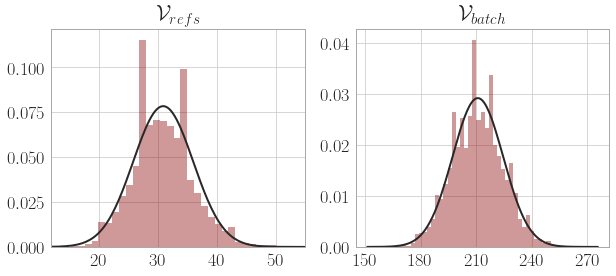

In [115]:
sns.set()
sns.set_style('whitegrid', rc={"axes.edgecolor": 'darkgray'})
sns.set_context('paper', font_scale=2.3, rc={"lines.linewidth": 2,
                                             "lines.markersize": 8})
fig, axs = plt.subplots(1, 2, figsize=(10, 4),
#                         gridspec_kw = {'width_ratios':[2, 5, 5]}
                       )

# sns.distplot(common, ax=axs[0], kde=False, color="darkred")
# axs[0].set_xticks(range(6))
# axs[0].set_xlim([0,5])
# axs[0].set_title('Common words\nper image') 

e = 0
sns.distplot(wpeim, ax=axs[e], kde=False, fit=stats.norm, color="darkred")
axs[e].set_xticks([10*x for x in range(2,6)])
axs[e].set_xlim([12,55])
axs[e].set_title('$\\mathcal V_{refs}$') #, fontsize=18)

e = 1
sns.distplot(wperbatch, ax=axs[e], kde=False, fit=stats.norm, color="darkred")
axs[e].set_xticks([30*x for x in range(5,10)])
# axs[1].set_xlim([12,55])
axs[e].set_title('$\\mathcal V_{batch}$') #, fontsize=18)

#, fontsize=18)

plt.savefig('../figures/stats_words_coco.png',
            dpi=300, bbox_inches='tight')

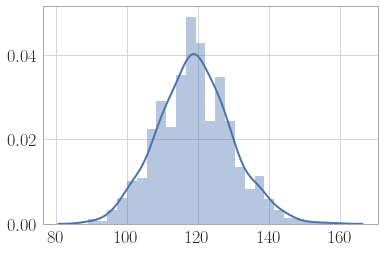

In [83]:
sns.distplot(wperbatch)

In [4]:
captions = [c for k, cap in caps.items() for c in cap]

In [5]:
len(captions)

414113

In [7]:
with open('../captions.txt', 'w') as f:
    for c in captions:
        f.write('%s\n' % ' '.join(c))